In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


In [51]:
# load dataset
df = pd.read_csv('ObesityDataSet.csv')

# EDA (Exploratory Data Analysis)

In [52]:
# menampilkan beberapa baris pertama
print("Head ObesityDataSet:")
display(df.head())

Head ObesityDataSet:


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [53]:
df.info()
print(f'Jumlah baris: {df.shape[0]}, jumlah kolom: {df.shape[1]}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

In [54]:
# untuk deskripsi statistik fitur numerik
print("Deskripsi Statistik Fitur Numerik:")
display(df.describe())

Deskripsi Statistik Fitur Numerik:


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2097,2102,2099,2100,2106,2100,2103,2099,2101,2106,2105,2098,2103,2102,2100,2105,2111
unique,1394,3,1562,1518,5,3,808,637,3,3,1263,3,1186,1130,5,6,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351


In [55]:
# untuk mengecek missing values
print("Missing Values per Kolom:")
display(df.isnull().sum().to_frame('missing_count'))

Missing Values per Kolom:


,missing_count
Age,14
Gender,9
Height,12
Weight,11
CALC,5
FAVC,11
FCVC,8
NCP,12
SCC,10
SMOKE,5


In [56]:
# untuk mengecek nilai unik per kolom
print("Unique Values per Kolom:")
display(df.nunique().to_frame('unique_count'))

Unique Values per Kolom:


,unique_count
Age,1394
Gender,3
Height,1562
Weight,1518
CALC,5
FAVC,3
FCVC,808
NCP,637
SCC,3
SMOKE,3


In [57]:
# untuk mengecek duplikasi
dup_count = df.duplicated().sum()
print(f'Jumlah baris duplikat: {dup_count}')

Jumlah baris duplikat: 18


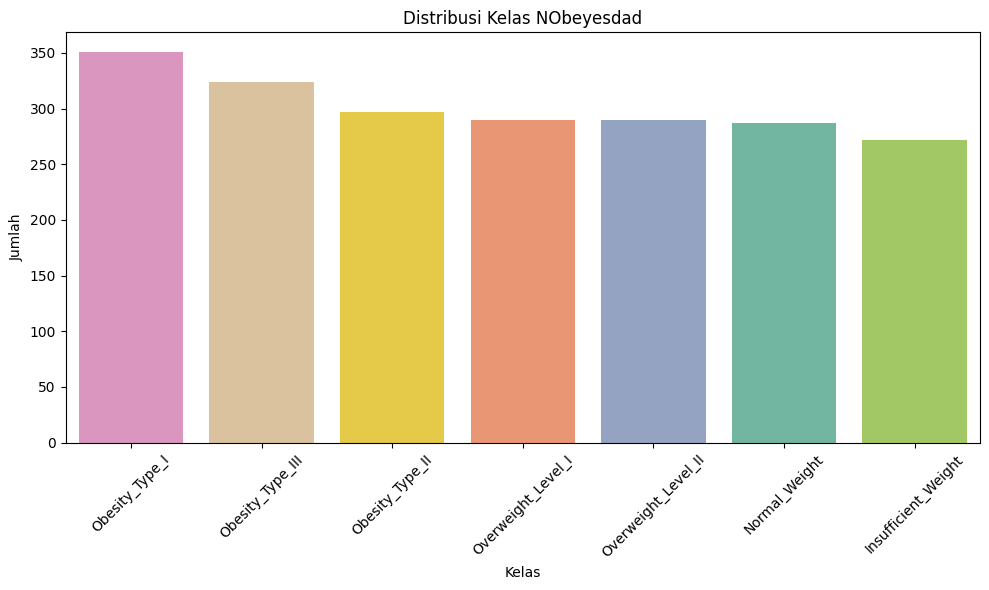

In [58]:
# untuk melihat keseimbangan/distribusi kelas target
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='NObeyesdad', hue='NObeyesdad', order=df['NObeyesdad'].value_counts().index, palette='Set2', legend=False)
plt.xticks(rotation=45)
plt.title('Distribusi Kelas NObeyesdad')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()

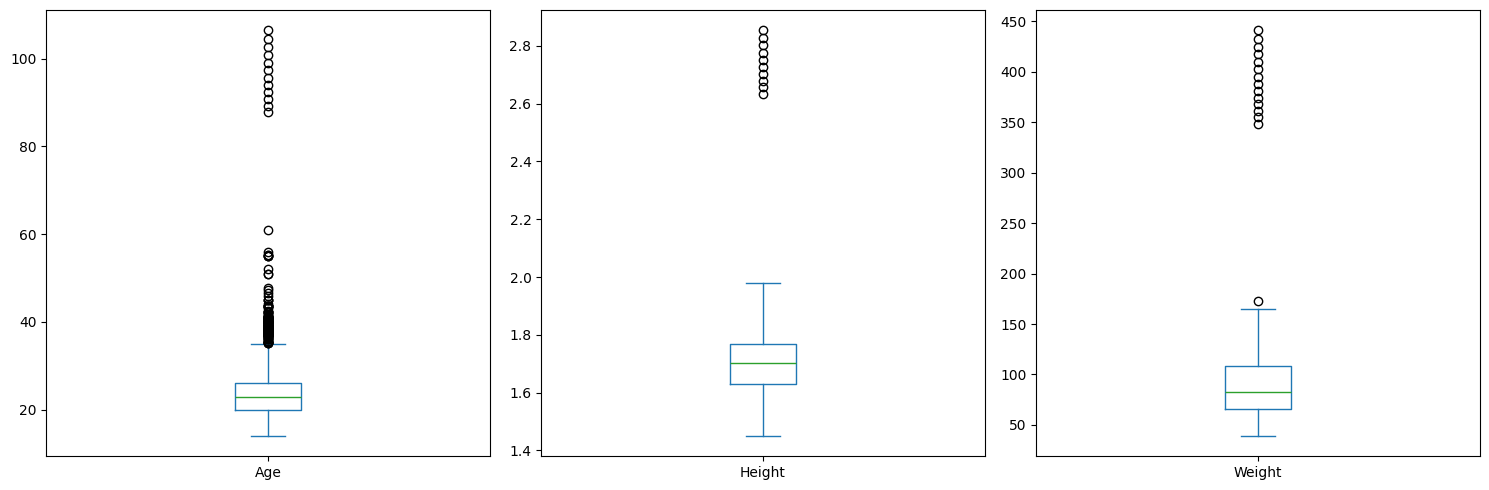

In [59]:
# Boxplot untuk deteksi outlier kolom numerik
num_cols = ['Age', 'Height', 'Weight']
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')
df[num_cols].plot(kind='box', subplots=True, layout=(1,3), figsize=(15,5))
plt.tight_layout()
plt.show()

**Kesimpulan EDA**

*   Dataset ObesityDataSet.csv memiliki 2111 baris dan 17 kolom.
*   Dari total 17 kolom, 14 kolom bertipe object, dan sisanya numerik.
*   Ditemukan missing values, unique values dan data duplikat yang perlu ditangani.
*   Distribusi kelas target NObeyesdad tampak tidak seimbang.
*   Terdapat outlier pada kolom numerik.












# Preprocessing Data

In [60]:
# Ganti tanda '?' menjadi NaN agar bisa dideteksi sebagai missing value
df.replace('?', np.nan, inplace=True)

In [61]:
# Ubah kolom-kolom yang seharusnya numerik ke tipe float
numerical_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Cek tipe kolom dan tentukan kolom kategorikal dan numerik
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Untuk data kategorikal, isi missing value dengan modus (nilai terbanyak)
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        imputer = SimpleImputer(strategy='most_frequent')
        df[col] = imputer.fit_transform(df[[col]]).ravel()

# Untuk data numerik, isi missing value dengan median
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        imputer = SimpleImputer(strategy='median')
        df[col] = imputer.fit_transform(df[[col]])

In [62]:
# Hapus data duplikat
before = df.shape[0]
df.drop_duplicates(inplace=True)
after = df.shape[0]


print(f"Jumlah data sebelum hapus duplikat: {before}")
print(f"Jumlah data setelah hapus duplikat: {after}")
print(f"Jumlah data duplikat yang dihapus: {before - after}")

Jumlah data sebelum hapus duplikat: 2111
Jumlah data setelah hapus duplikat: 2091
Jumlah data duplikat yang dihapus: 20


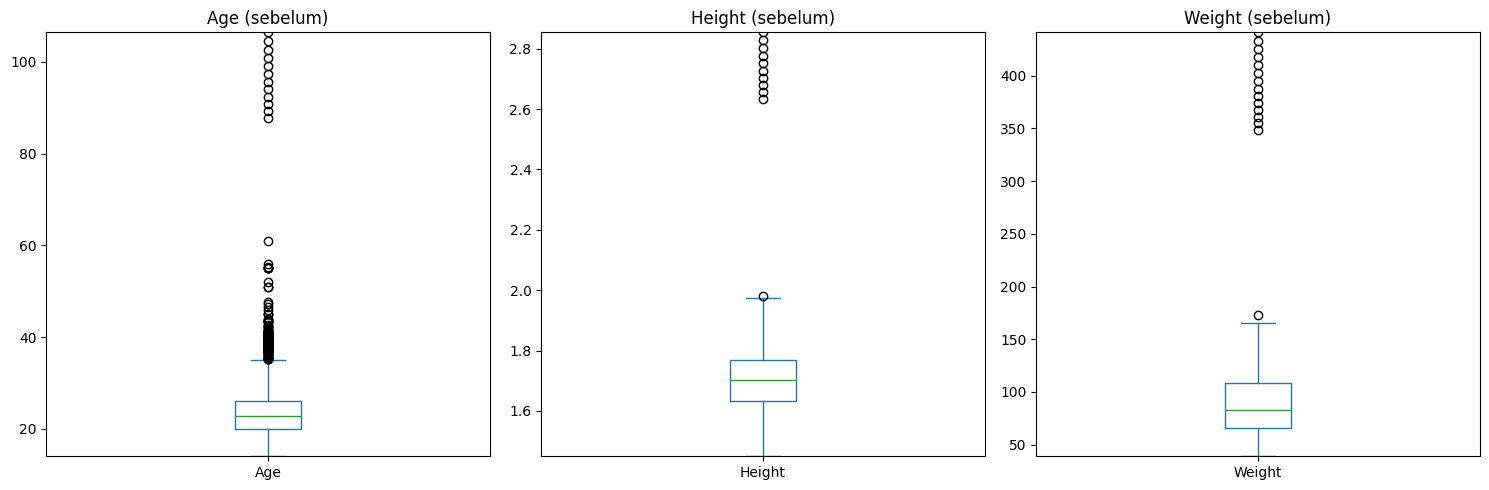

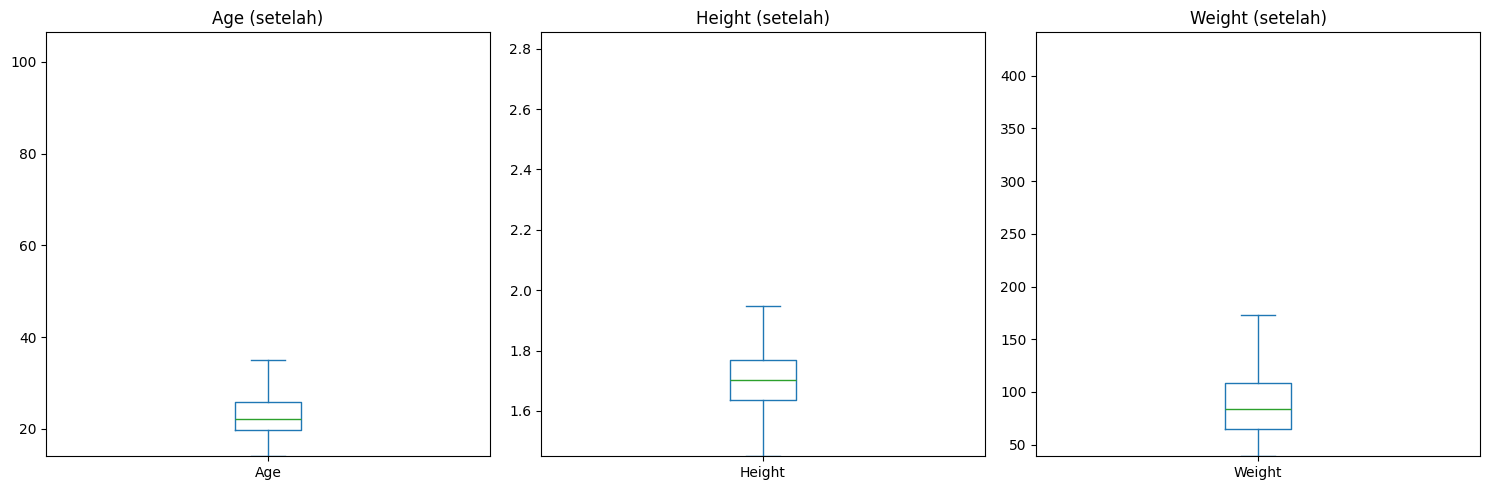

In [63]:
# Pastikan data numerik benar
num_cols = ['Age', 'Height', 'Weight']
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

# Tentukan batas sumbu y agar konsisten
y_limits = {}
for col in num_cols:
    min_val = df[col].min()
    max_val = df[col].max()
    y_limits[col] = (min_val, max_val)

# visualisasi data numerik sebelum menangani outlier
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(num_cols):
    df[[col]].plot(kind='box', ax=axes[i])
    axes[i].set_title(f"{col} (sebelum)")
    axes[i].set_ylim(y_limits[col])
plt.tight_layout()
plt.show()

# Metode IQR untuk menghapus outlier dari kolom numerik
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

# Visualisasi boxplot setelah outlier ditangani
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(num_cols):
    df[[col]].plot(kind='box', ax=axes[i])
    axes[i].set_title(f"{col} (setelah)")
    axes[i].set_ylim(y_limits[col])
plt.tight_layout()
plt.show()

In [64]:
# Encoding fitur kategorikal (selain target)
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('NObeyesdad')

# Label encoding untuk fitur kategorikal
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Encoding untuk target
target_encoder = LabelEncoder()
df['NObeyesdad'] = target_encoder.fit_transform(df['NObeyesdad'])
label_encoders['NObeyesdad'] = target_encoder

# Tampilkan hasil encode awal
print("Data setelah encoding:")
display(df.head())


Data setelah encoding:


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,0,1.62,64.0,3,0,2.0,3.0,0,0,2.0,1,0.0,1.0,2,3,1
1,21.0,0,1.52,56.0,2,0,3.0,3.0,1,1,3.0,1,3.0,0.0,2,3,1
2,23.0,1,1.80,77.0,1,0,2.0,3.0,0,0,2.0,1,2.0,1.0,2,3,1
3,27.0,1,1.80,87.0,1,0,3.0,3.0,0,0,2.0,0,2.0,0.0,2,4,5
4,22.0,1,1.78,89.8,2,0,2.0,1.0,0,0,2.0,0,0.0,0.0,2,3,6


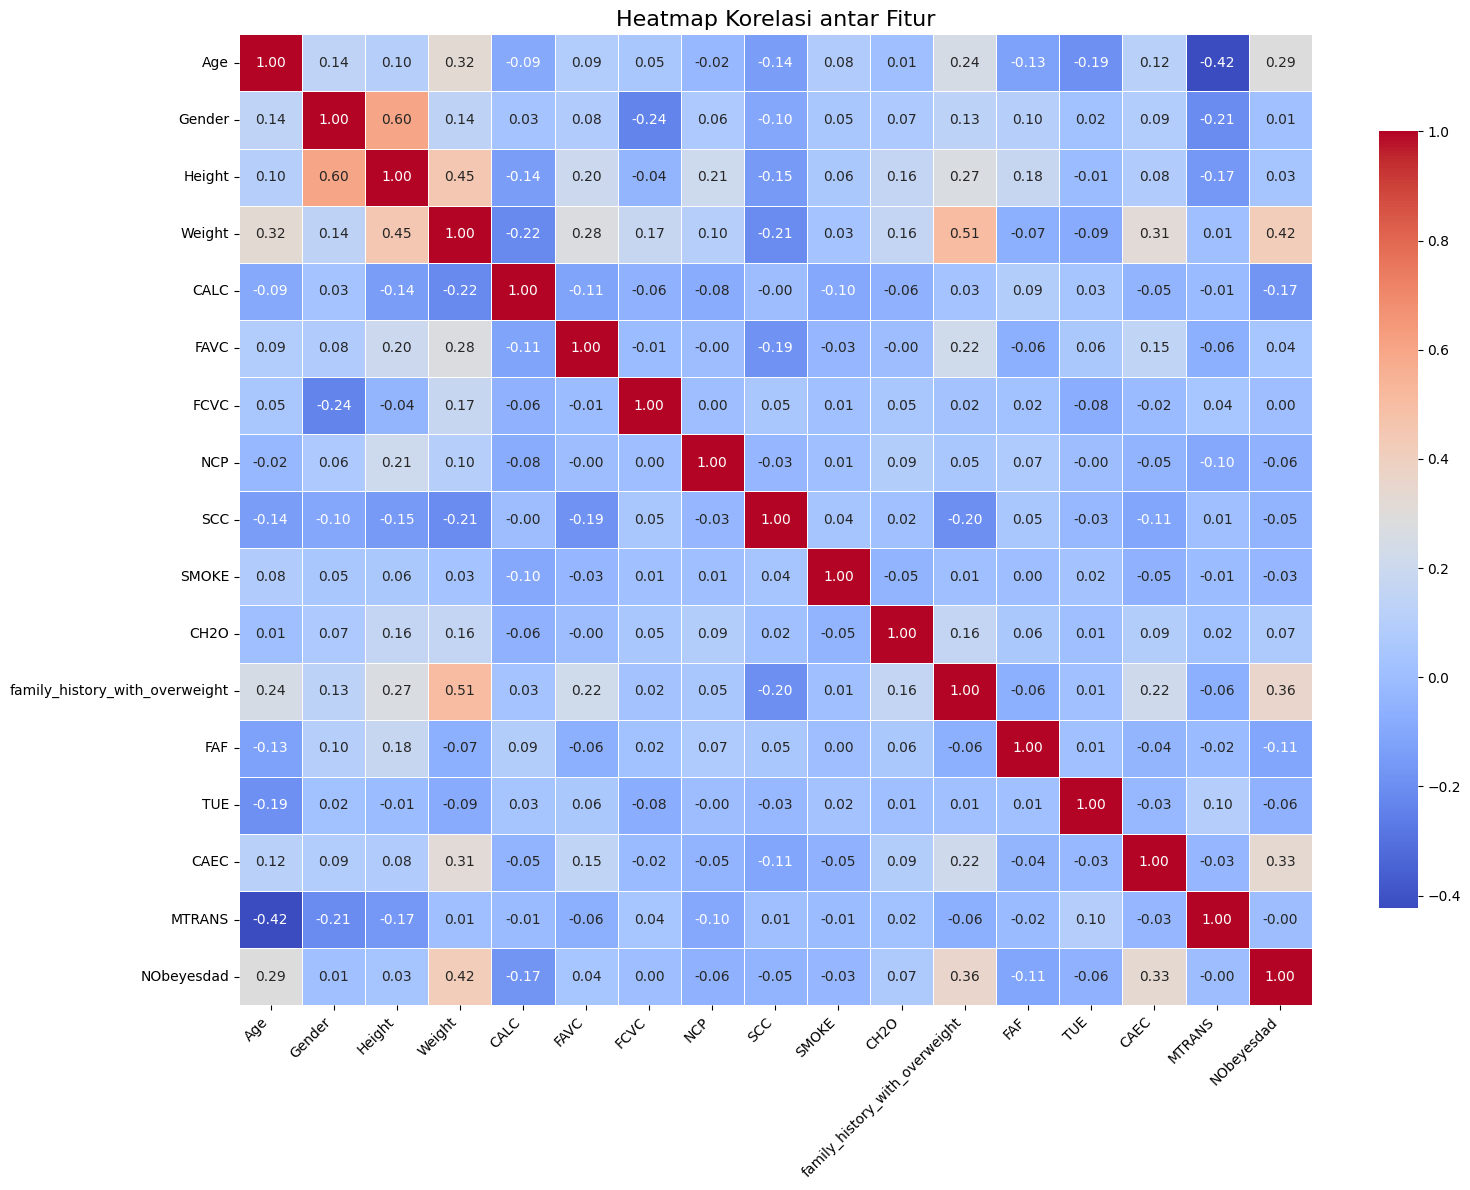

In [65]:
# Heatmap korelasi
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title("Heatmap Korelasi antar Fitur", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

In [66]:
# Pisahkan fitur dan target
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

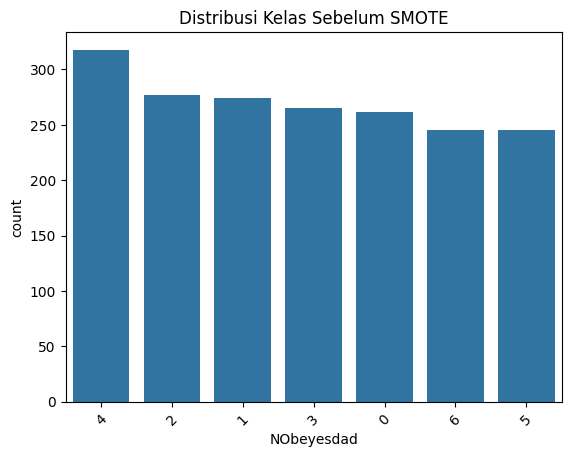

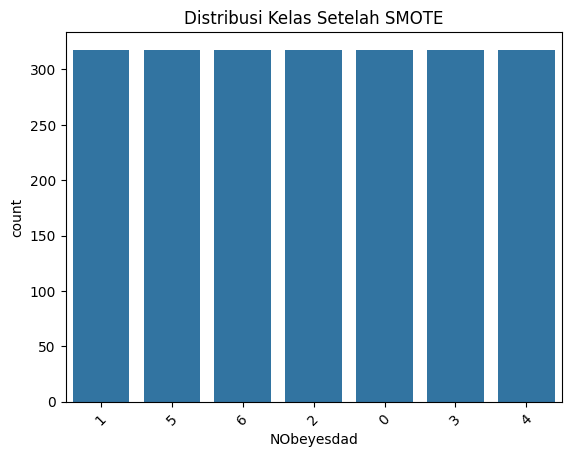

In [67]:
# Visualisasi distribusi kelas sebelum SMOTE
sns.countplot(x=y, order=pd.Series(y).value_counts().index)
plt.title("Distribusi Kelas Sebelum SMOTE")
plt.xticks(rotation=45)
plt.show()

# Tangani ketidakseimbangan kelas dengan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Distribusi kelas setelah SMOTE
sns.countplot(x=y_resampled, order=pd.Series(y_resampled).value_counts().index)
plt.title("Distribusi Kelas Setelah SMOTE")
plt.xticks(rotation=45)
plt.show()

In [68]:
# Split data menjadi data train dan test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print("Jumlah Data Train:", X_train.shape)
print("Jumlah Data Test:", X_test.shape)

Jumlah Data Train: (1780, 16)
Jumlah Data Test: (446, 16)


Kesimpulan Preprocessing Data


*   Missing values diatasi dengan mengganti nilai "?" pada kolom kategorikal menggunakan modus dan numerik menggunakan median.
*   Semua fitur kategorikal telah dikonversi ke bentuk numerik menggunakan Label Encoding.
*   Data duplikat berhasil dihapus.
*   Data numerik telah dinormalisasi menggunakan StandardScaler supaya skala yang dimiliki seragam.
*   Menggunakan oversampling yaitu SMOTE untuk menangani distribusi kelas target yang tidak seimbang dan berhasil ditangani.
*   Melakukan pembagian dataset dengan proporsi data train dan data test dengan proporsi 80:20 yang nantinya akan digunakan saat langkah pemodelan.
